In [1]:
library(ggplot2)
library(dplyr)
library(arrow)
library(devtools)
devtools::install_github("thomasp85/patchwork")
library(patchwork)
library(ggExtra)
library(ggplotify)

Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘arrow’ was built under R version 4.1.3”

Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp


Warning message:
“package ‘devtools’ was built under R version 4.1.3”
Loading required package: usethis

Warning message:
“package ‘usethis’ was built under R version 4.1.3”
Skipping install of 'patchwork' from a github remote, the SHA1 (03197c73) has not changed since last install.
  Use `force = TRUE` to force installation

Warning message:
“package ‘ggExtra’ was built under R version 4.1.3”
Warning message:
“package ‘ggplotify’ was built under R version 4.1.3”


In [14]:
# set path to the loadable data
data_path <- "../../data/All_academic_projects_funded_by_NIH_cleaned.parquet"
academic_df <- arrow::read_parquet(data_path)
academic_df$combined_institute_and_activity <- paste(academic_df$`Institute/Center`, academic_df$`Activity Code`, sep = " - ")
academic_df$`Total Funding` <- academic_df$`Total Funding` / 1000000
dim(academic_df)
head(academic_df)

[1] 828   8

Activity Code,Institute/Center,Mechanism/Funding Source,Number of Applications Reviewed,Number of Applications Awarded,Success Rate,Total Funding,combined_institute_and_activity
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
P01,NCI,RPG - Direct,89,17,0.1910112,41.733718,NCI - P01
R00,NCI,RPG - Direct,1,1,1.0000000,0.783430,NCI - R00
R01,NCI,RPG - Direct,5442,793,0.1457185,437.729824,NCI - R01
R03,NCI,RPG - Direct,369,50,0.1355014,4.817701,NCI - R03
R15,NCI,RPG - Direct,138,20,0.1449275,8.818798,NCI - R15
R21,NCI,RPG - Direct,1646,199,0.1208991,48.008452,NCI - R21


In [20]:
# select RO1 from NCI
nci_ro1_df <- academic_df %>% filter(`Activity Code` == "R01")
dim(nci_ro1_df)
nci_ro1_df

[1] 22  8

Activity Code,Institute/Center,Mechanism/Funding Source,Number of Applications Reviewed,Number of Applications Awarded,Success Rate,Total Funding,combined_institute_and_activity
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
R01,NCI,RPG - Direct,5442,793,0.1457185,437.729824,NCI - R01
R01,NHLBI,RPG - Direct,3598,714,0.1984436,472.262355,NHLBI - R01
R01,NIDCR,RPG - Direct,429,75,0.1748252,40.778652,NIDCR - R01
R01,NIDDK,RPG - Direct,2687,554,0.2061779,303.024282,NIDDK - R01
R01,NINDS,RPG - Direct,2556,471,0.1842723,253.714787,NINDS - R01
R01,NIAID,RPG - Direct,3526,601,0.1704481,394.444727,NIAID - R01
R01,NIGMS,RPG - Direct,1563,363,0.2322457,148.593932,NIGMS - R01
R01,NICHD,RPG - Direct,1522,255,0.1675427,156.602301,NICHD - R01
R01,NEI,RPG - Direct,840,223,0.2654762,108.921715,NEI - R01


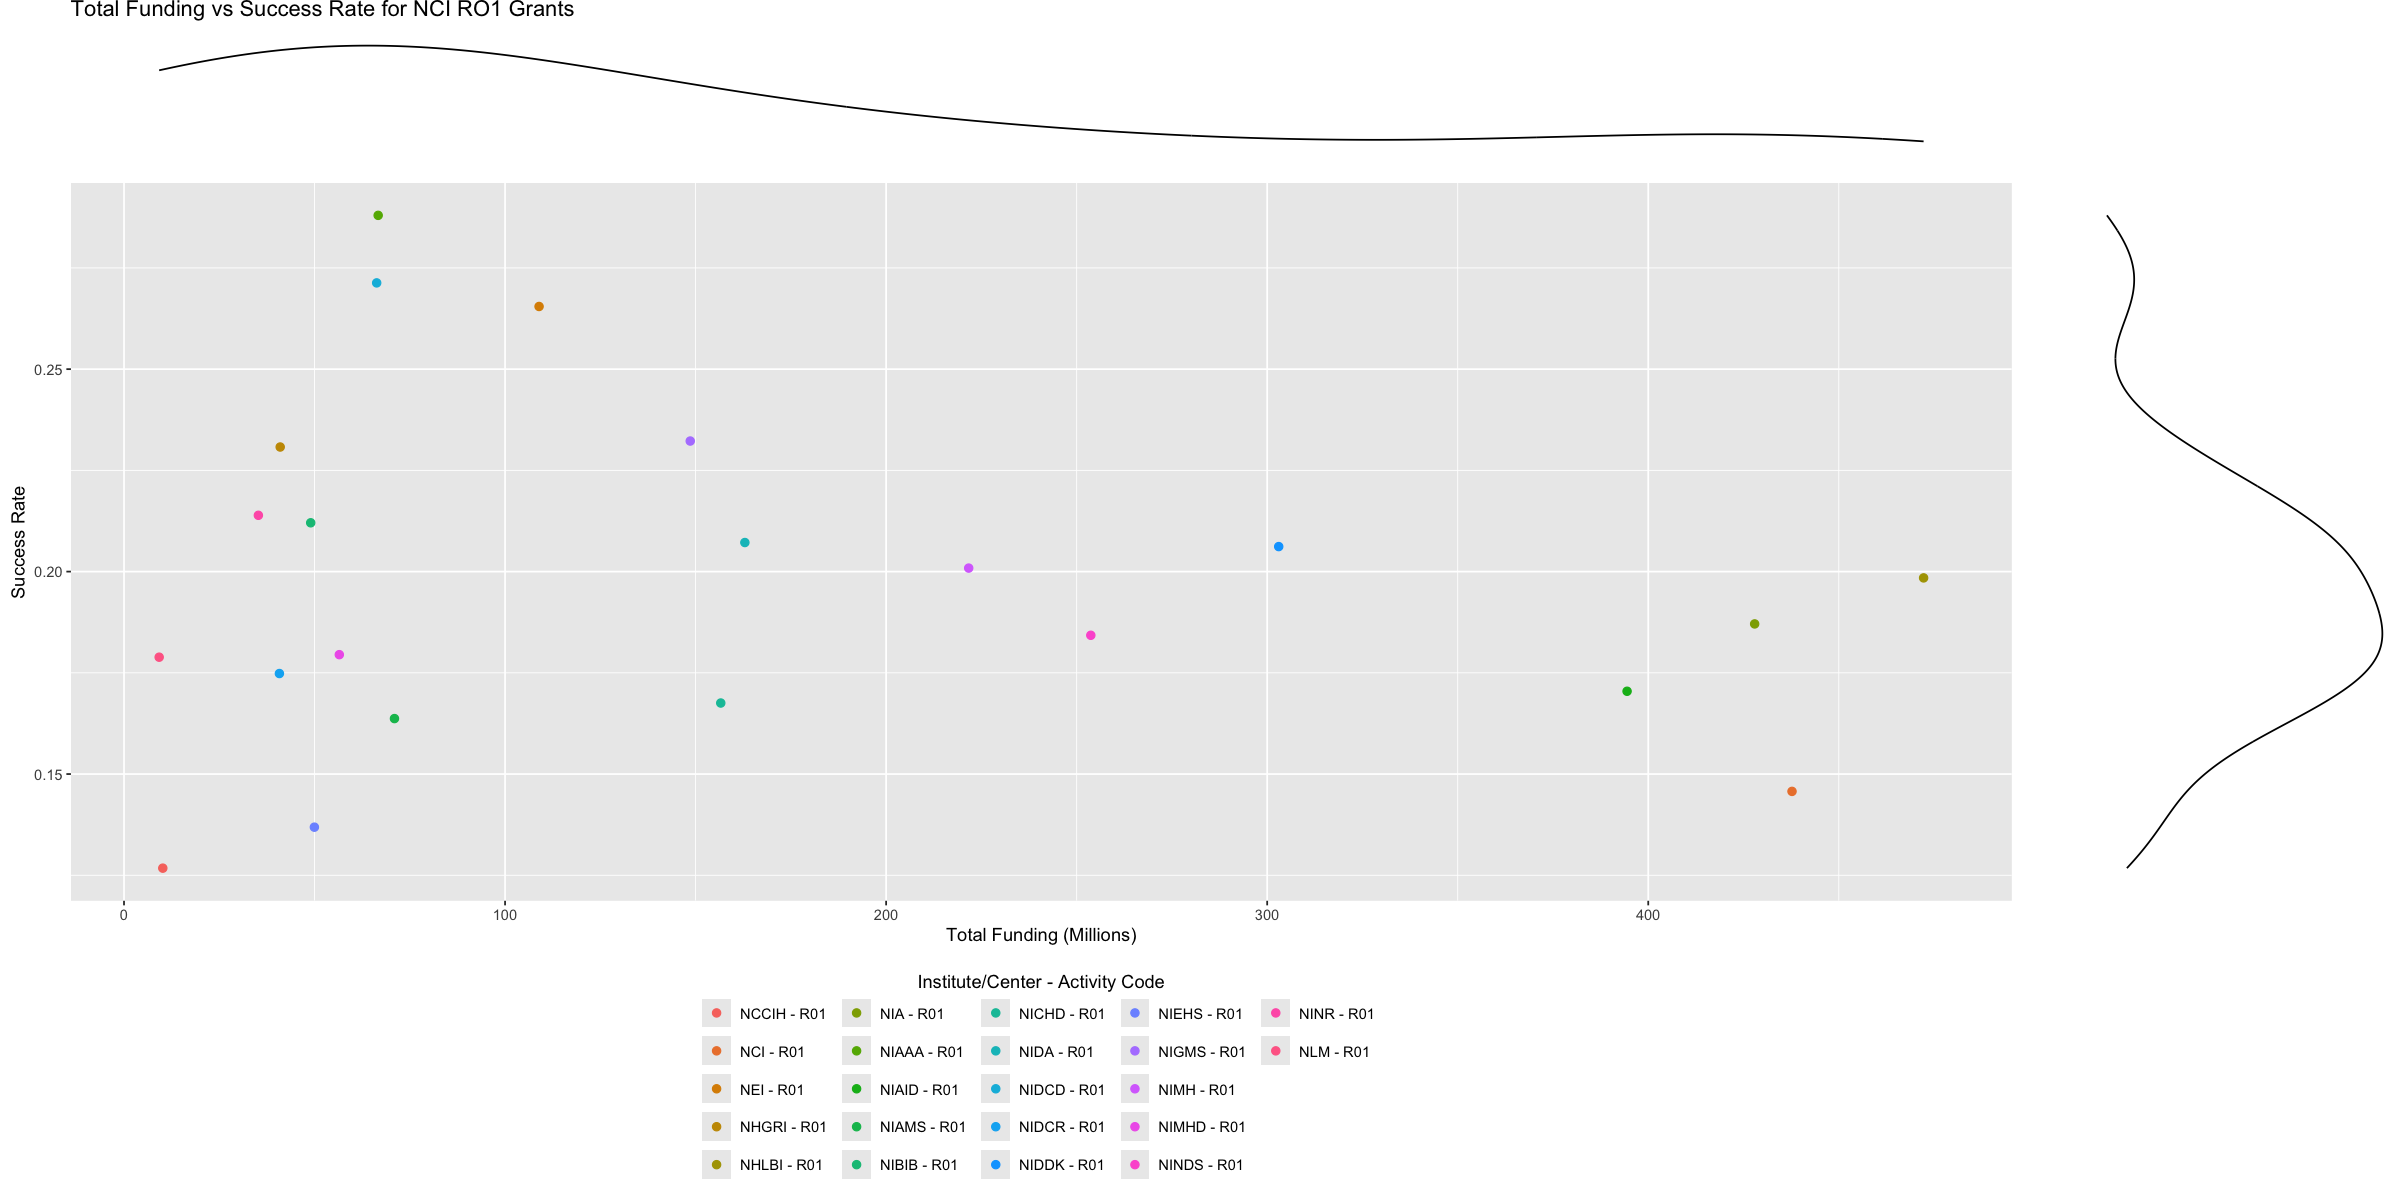

In [24]:
# get a scaled metric for the total funding amount, total awards, total reviews, and success rate for each institution and activity code
funding_vs_success_plot <- (
    ggplot(data = nci_ro1_df, aes(x = `Total Funding`, y = `Success Rate`, color = combined_institute_and_activity))
    + geom_point(size = 2)
    # Move legedn to the bottom
    + theme(legend.position = "bottom")
    + labs(title = "Total Funding vs Success Rate for NCI RO1 Grants",
           x = "Total Funding (Millions)",
           y = "Success Rate",
              color = "Institute/Center - Activity Code")
    # make the legend title to be on the top of the legend
    + theme(legend.title = element_text(hjust = 0.5))
      + guides(color = guide_legend(title.position = "top")
      )
)
funding_vs_success_plot <- ggMarginal(funding_vs_success_plot, type="density")
funding_vs_success_plot


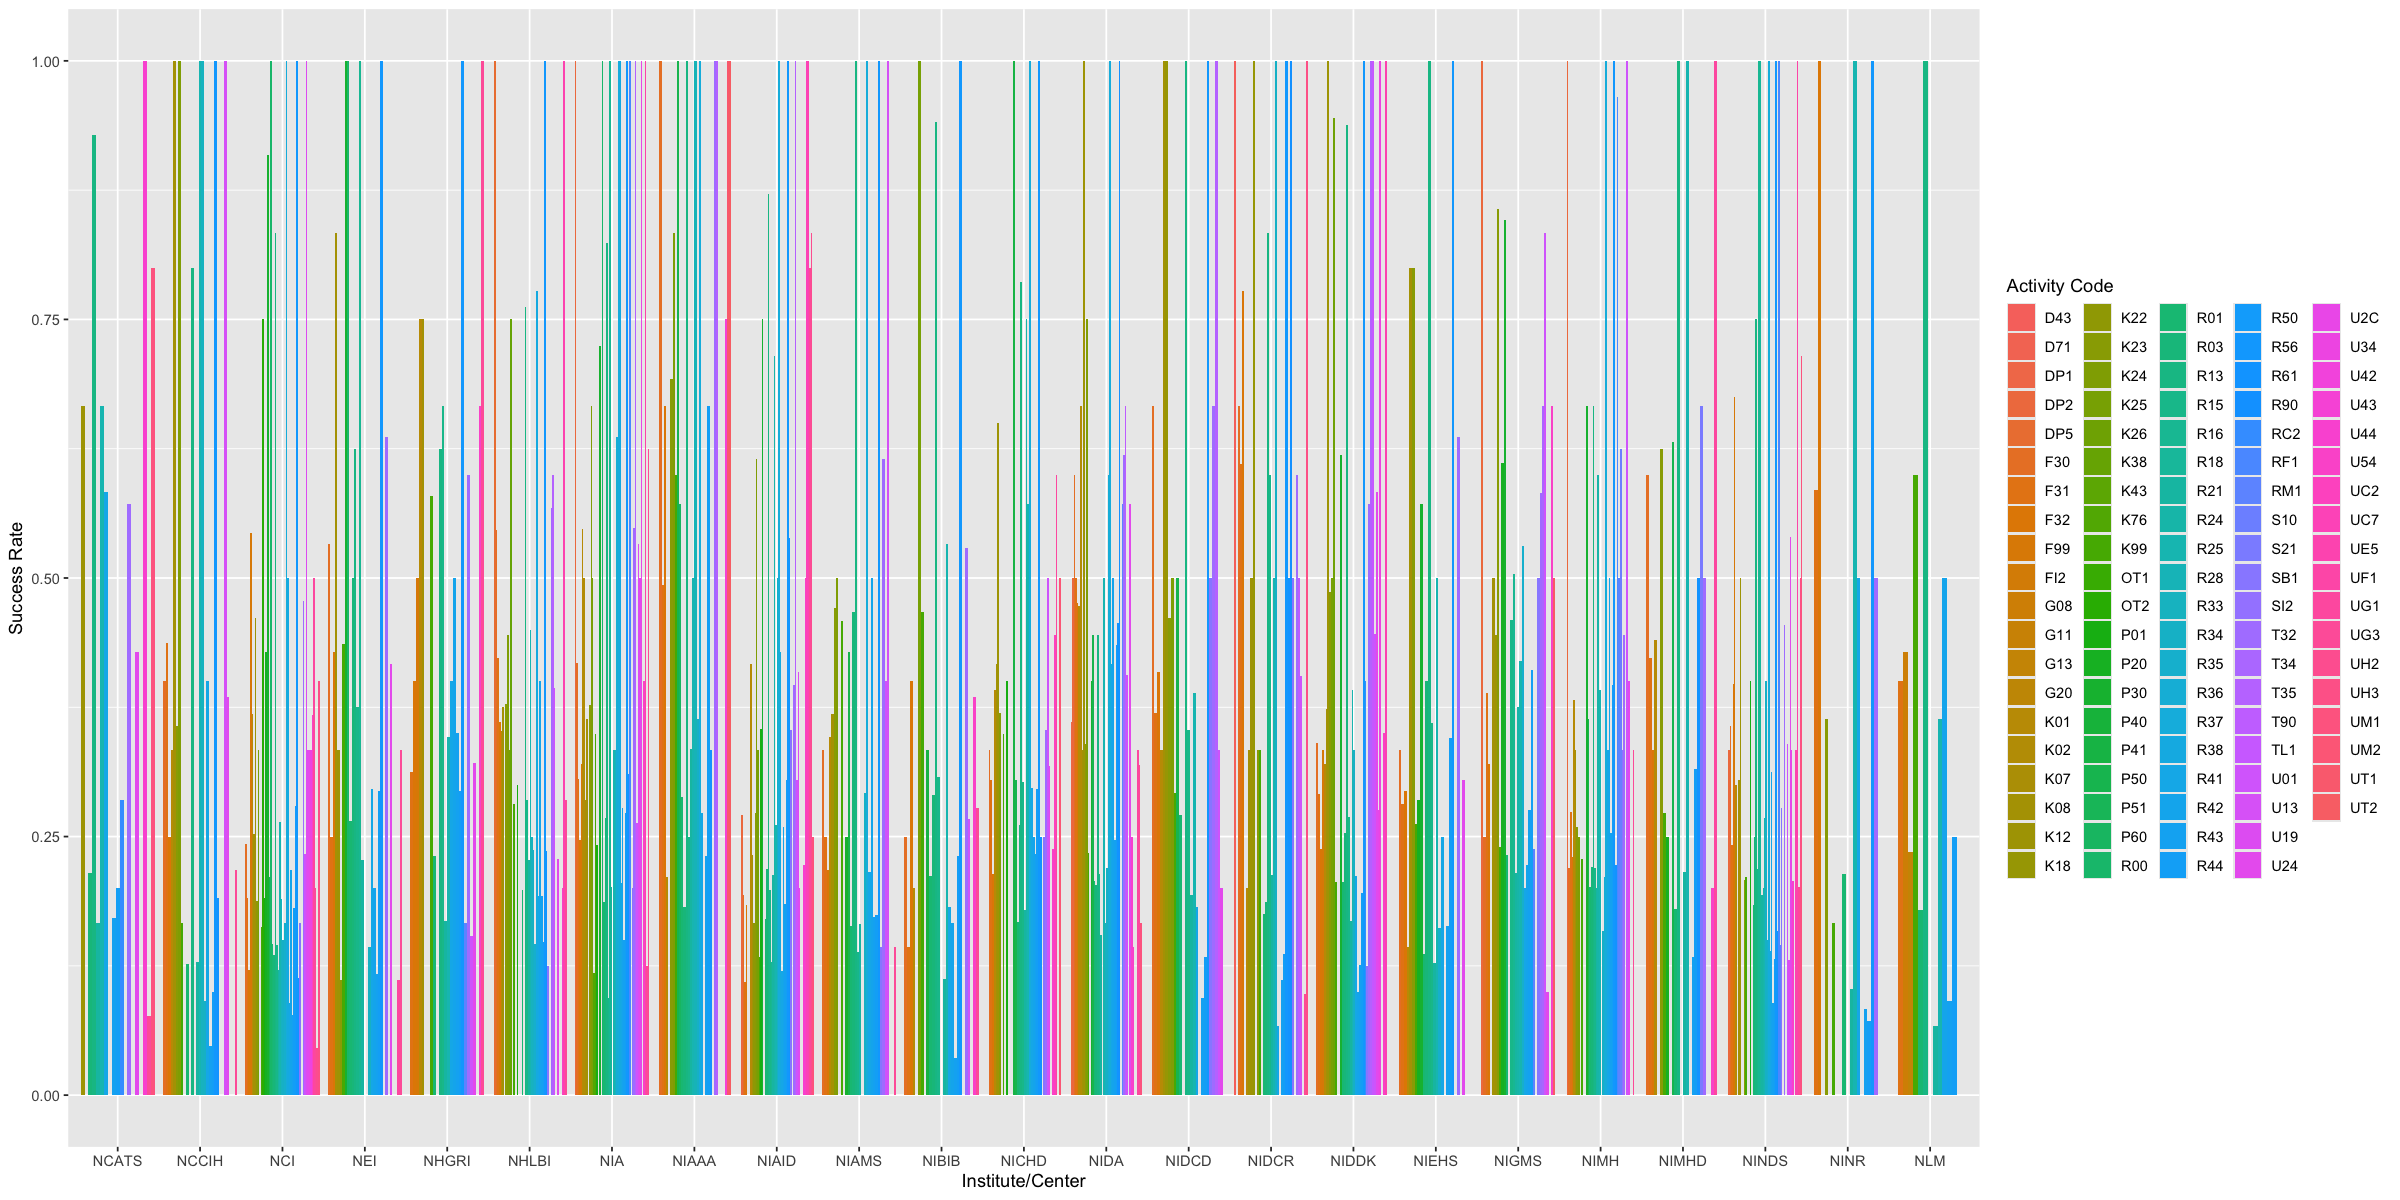

In [4]:
# plot the success rate of the projects by Activity Code and Institute
height <- 10
width <- 20
options(repr.plot.width = width, repr.plot.height = height)
success_plot <- (
    ggplot(data = academic_df, aes(x = `Institute/Center`, y = `Success Rate`, fill = `Activity Code`))
    + geom_bar(stat = "identity", position = "dodge")
    )
success_plot

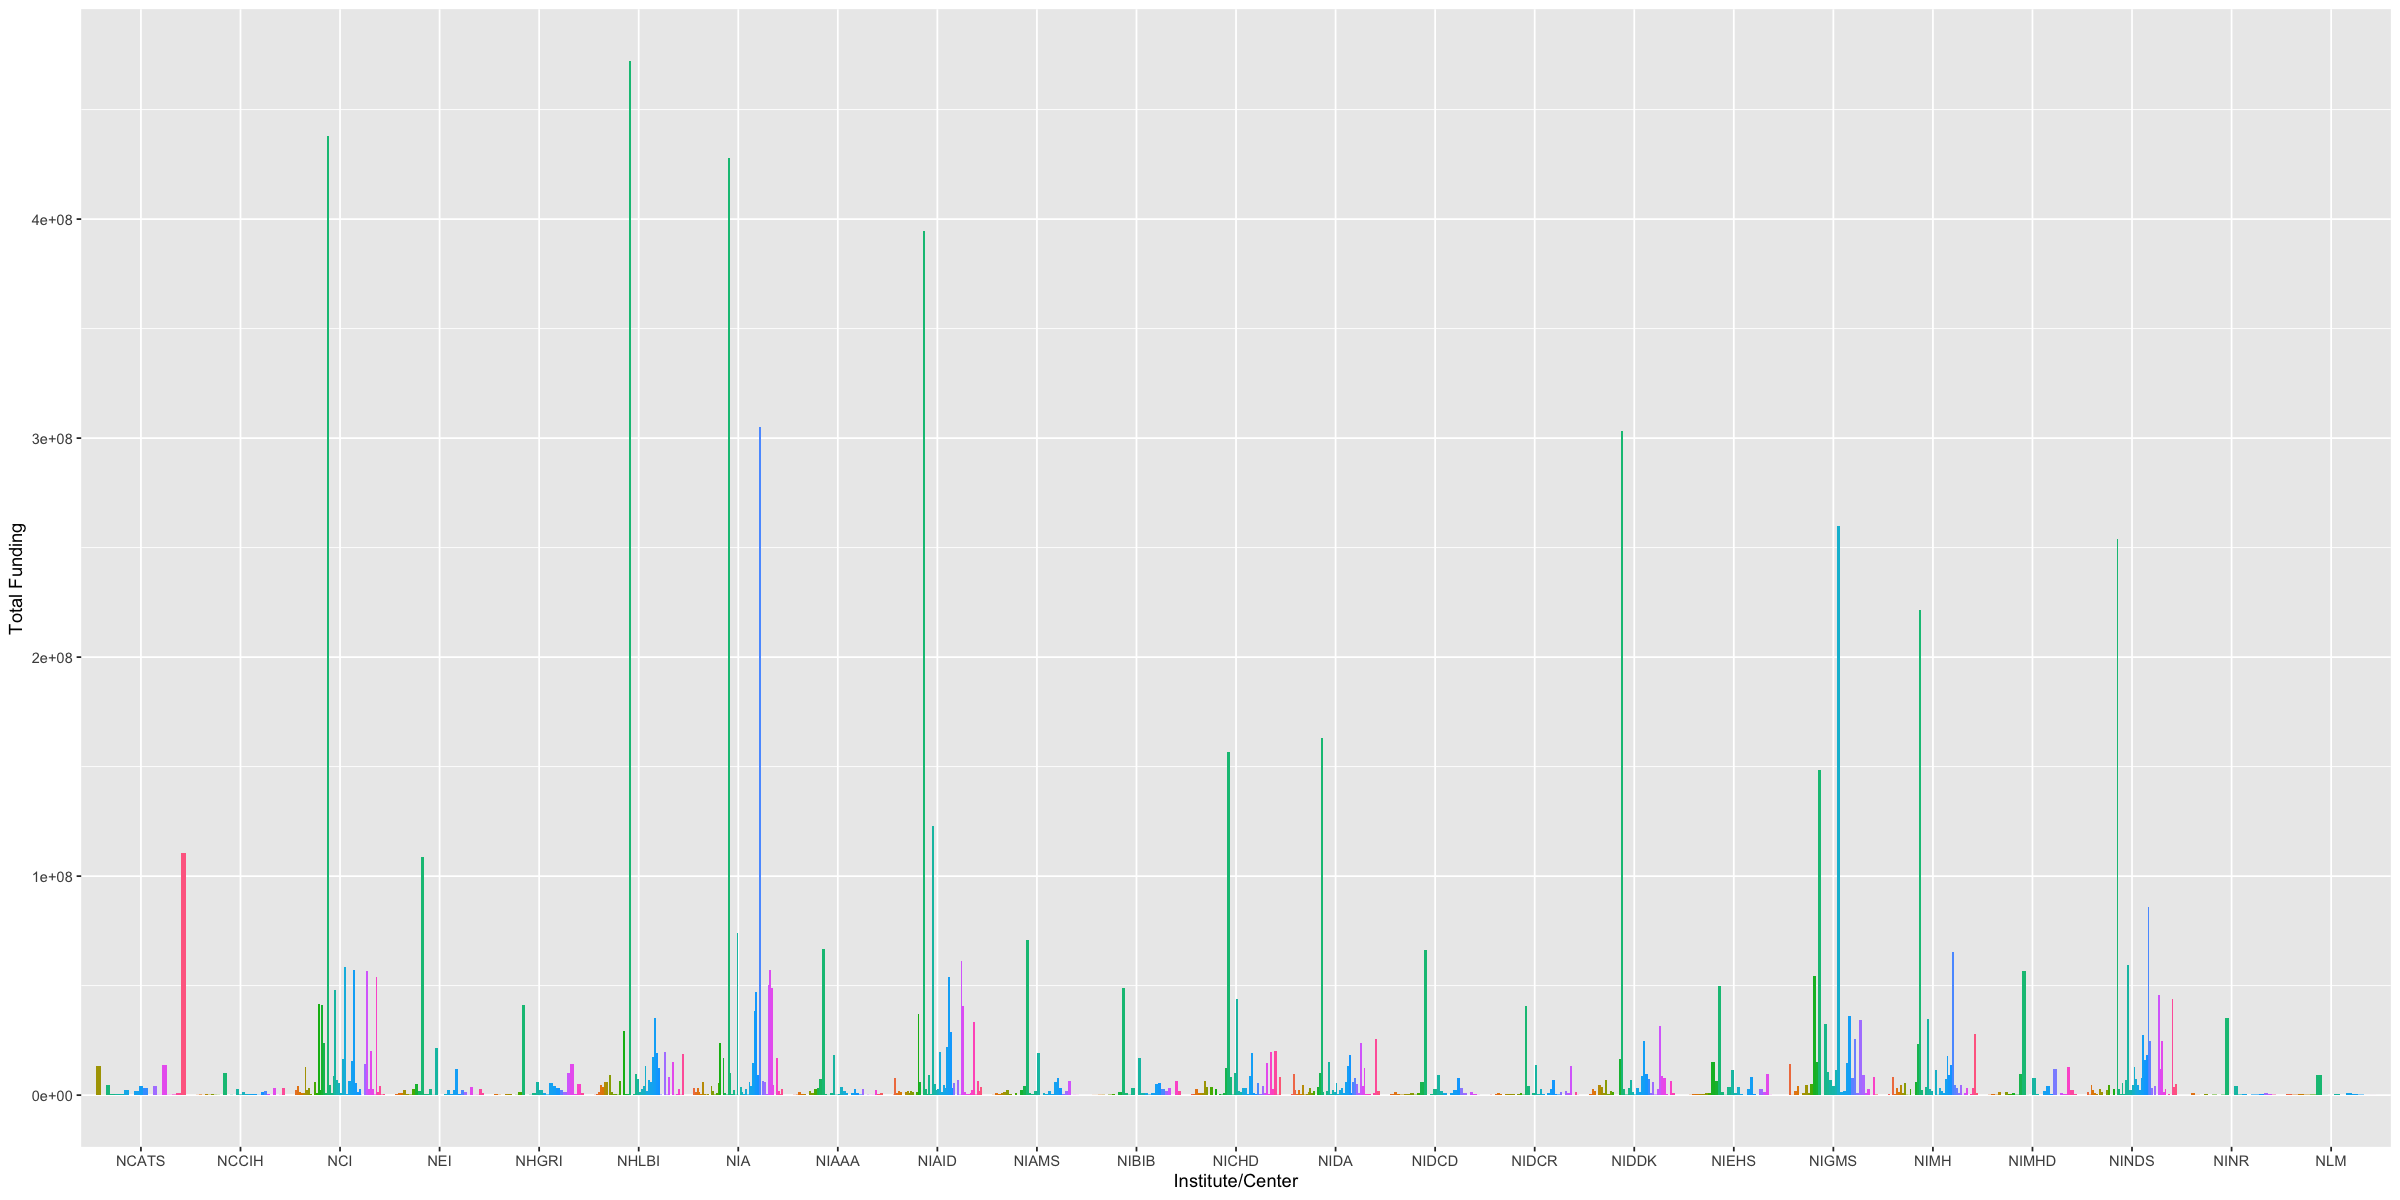

In [12]:
# plot the total amount of funding by Activity Code and Institute
dollar_plot <- (
    ggplot(data = academic_df, aes(x = `Institute/Center`, y = `Total Funding`, fill = `Activity Code`))
    + geom_bar(stat = "identity", position = "dodge")
    # remove legend
    + theme(legend.position = "none")
    )
dollar_plot

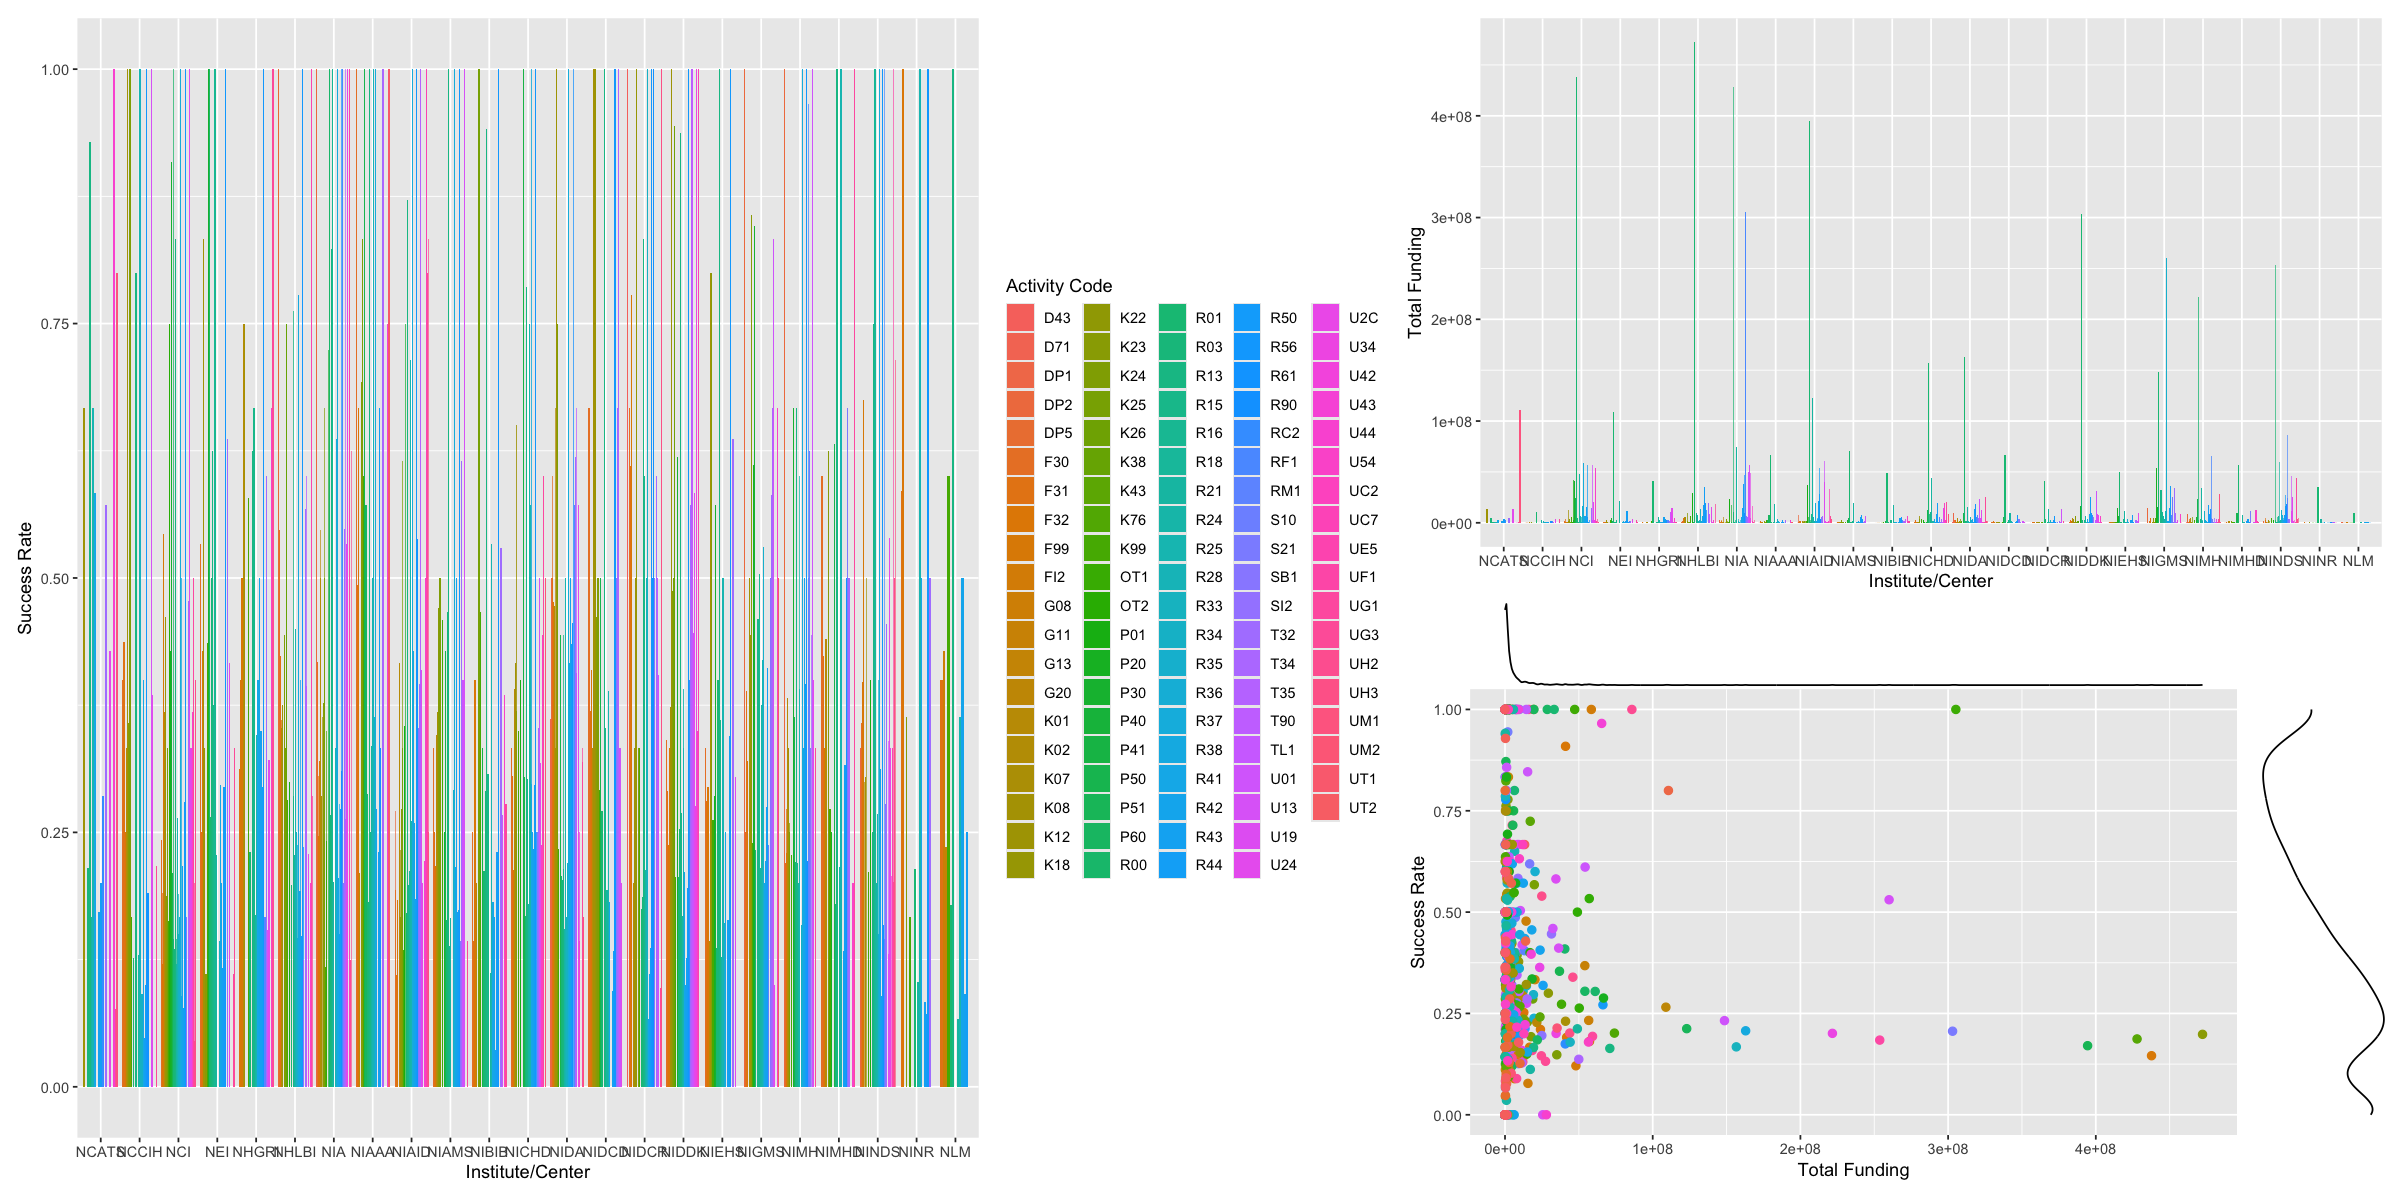

In [13]:
# Final plot combining all plots in patchwork
success_plot + dollar_plot / as.grob(funding_vs_success_plot)
